### A Batch Practical Exam Code:
##### Aim-1: https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Real%20Estate%20Valuation

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [37]:
data = pd.DataFrame(pd.read_csv("./Real Estate Valuation/Real estate valuation data set.csv"))

In [38]:
print(data.head())

   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1                        42.2  
2                        47.3  


In [39]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB
None


In [40]:
print(data.describe())

       X1 transaction date  X2 house age  \
count           414.000000    414.000000   
mean           2013.148971     17.712560   
std               0.281967     11.392485   
min            2012.667000      0.000000   
25%            2012.917000      9.025000   
50%            2013.167000     16.100000   
75%            2013.417000     28.150000   
max            2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  X6 longitude  \
count                       414.000000   414.000000    414.000000   
mean                   

In [41]:
data.isnull().sum()*100/data.shape[0]

X1 transaction date                       0.0
X2 house age                              0.0
X3 distance to the nearest MRT station    0.0
X4 number of convenience stores           0.0
X5 latitude                               0.0
X6 longitude                              0.0
Y house price of unit area                0.0
dtype: float64

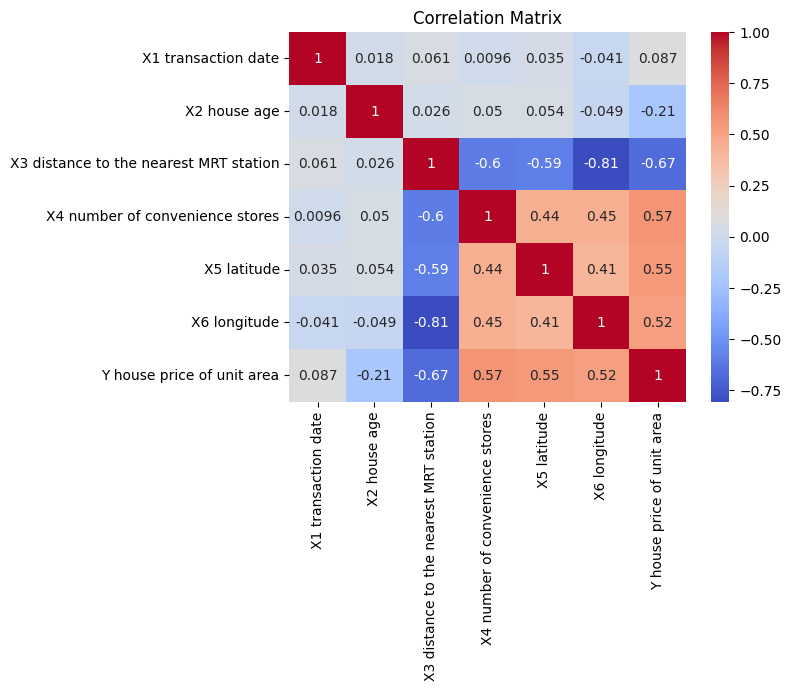

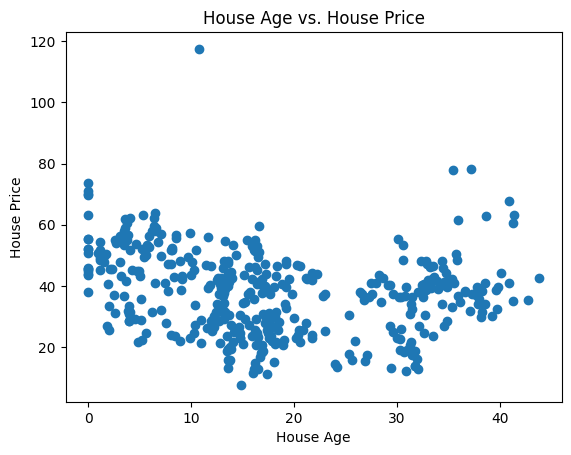

In [42]:
# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot between house age and house price
plt.scatter(data['X2 house age'], data['Y house price of unit area'])
plt.title('House Age vs. House Price')
plt.xlabel('House Age')
plt.ylabel('House Price')
plt.show()

In [43]:
X = data.drop(columns=['Y house price of unit area'])
Y = data['Y house price of unit area']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [44]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [45]:
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 53.50561912450505
R-squared: 0.6810580555095769


In [46]:
new_data = pd.DataFrame({
    'X1 transaction date': [2013.917],
    'X2 house age': [15],
    'X3 distance to the nearest MRT station': [400.0],
    'X4 number of convenience stores': [7],
    'X5 latitude': [24.977],
    'X6 longitude': [121.541]
})

prediction = model.predict(new_data)
print(f'Predicted house price: {prediction[0]}')


Predicted house price: 50.894629228132544
